In [31]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import time 

import torch
import mrmr
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [32]:
# Constants
DATA_PATH = './data/'
DATASET_PATH = DATA_PATH + 'self-calculated/'
MODELS_PATH = DATA_PATH + 'models/'

In [33]:
# Loading functions
def load_data_frame(txt):
    return pd.read_csv(DATASET_PATH + txt + '.txt', header=None, sep='\s+')

In [34]:
data_set = load_data_frame('complete-filtered')
data_set.columns = ['bodyAccX', 'gravityAccX', 'bodyAccY', 'gravityAccY', 'bodyAccZ',
       'gravityAccZ', 'gyroX', 'gyroY', 'gyroZ', 'subject', 'activity']

activity_labels = load_data_frame('activity_labels')
activity_labels.columns = ['id', 'activity']

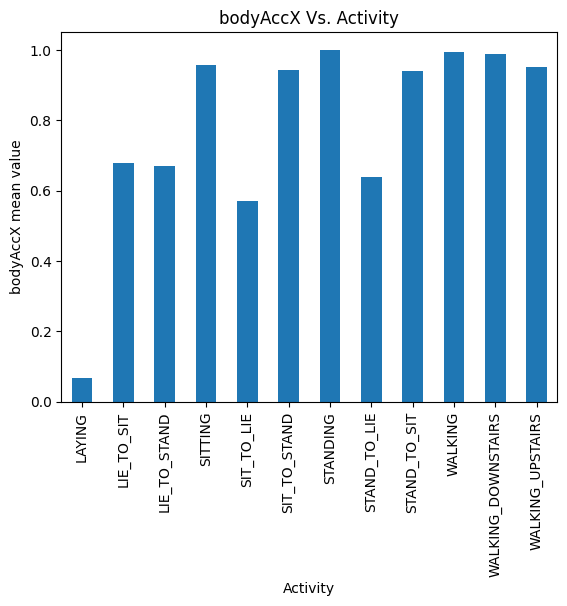

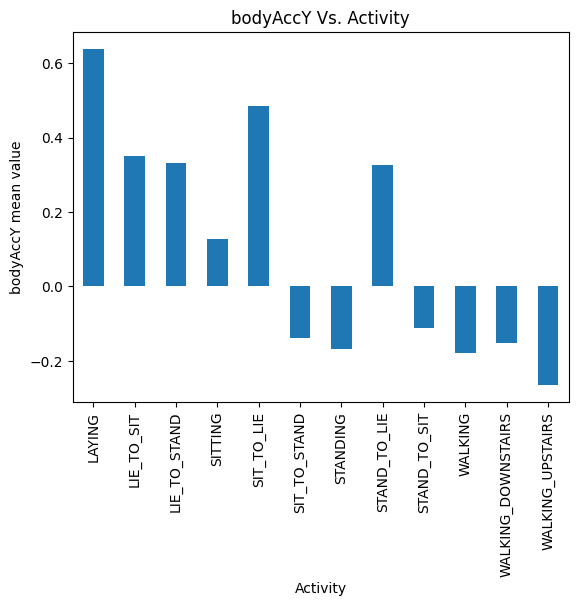

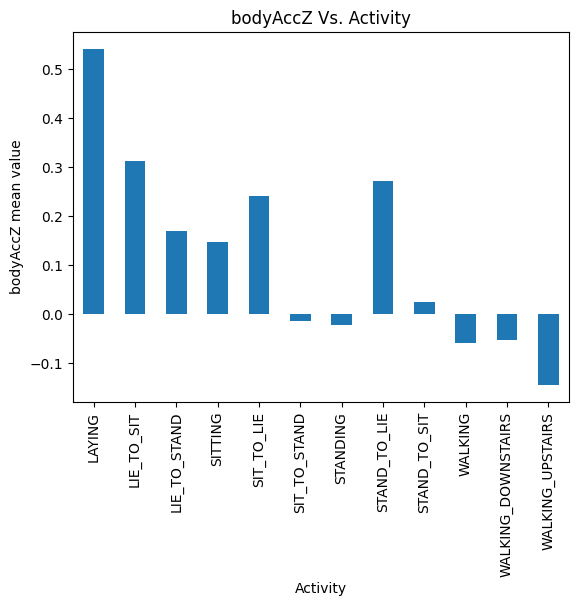

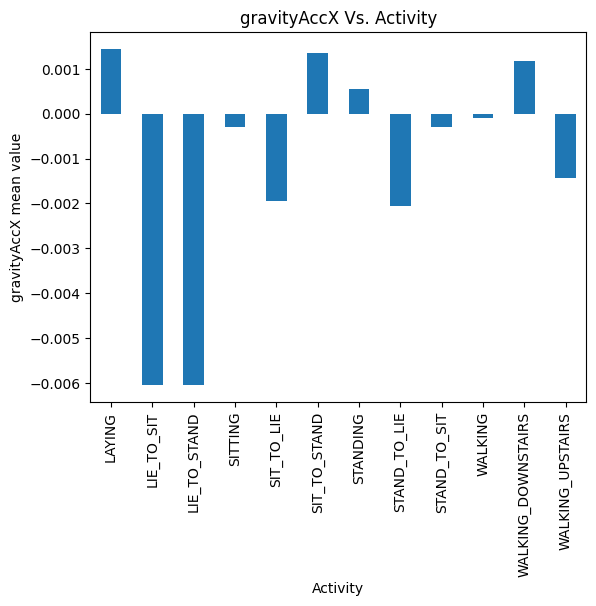

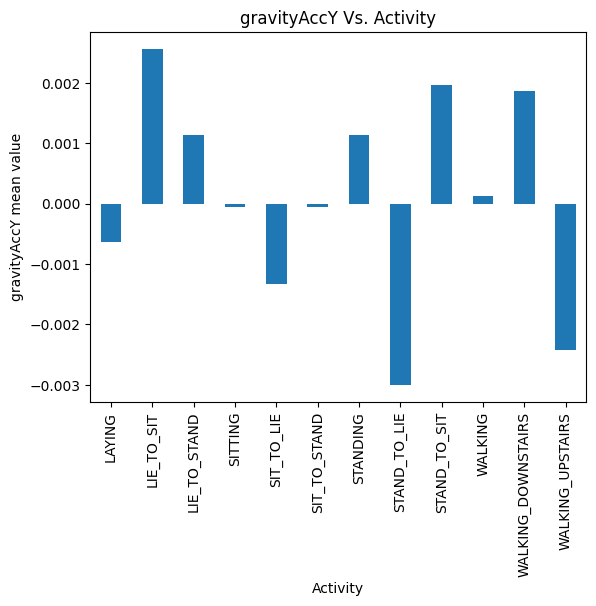

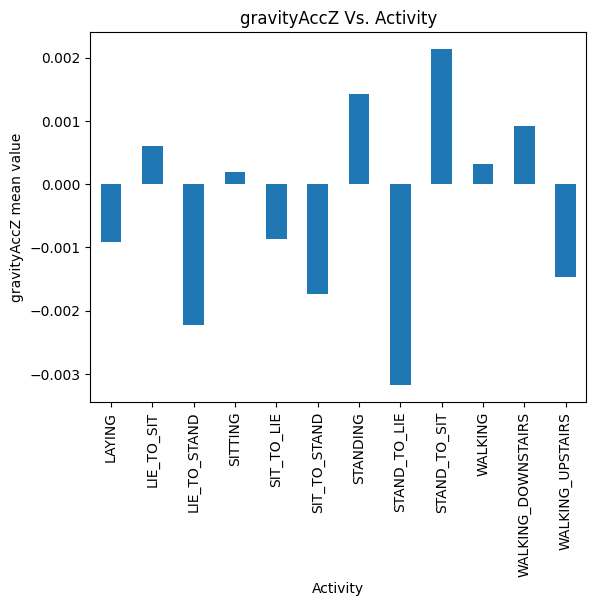

In [35]:
# Graphing features
complete_set_train = data_set.copy()
for x in activity_labels['id']:
    complete_set_train['activity'] = complete_set_train['activity'].replace(x, activity_labels['activity'][x - 1])

selected_features_graph = ['bodyAccX', 'bodyAccY', 'bodyAccZ',
                           'gravityAccX', 'gravityAccY', 'gravityAccZ']

for selected_feature in selected_features_graph:
    if selected_feature != '':
        train_subset = complete_set_train[[selected_feature, 'activity']]
        grouped_train_by_feature = train_subset.groupby('activity').mean()

        grouped_train_by_feature.plot(kind='bar', legend=False)
        plt.title(selected_feature + ' Vs. Activity')
        plt.xlabel('Activity')
        plt.ylabel(selected_feature + ' mean value')
        plt.show()